In [1]:
%matplotlib inline
!pip install sdeint
import numpy as np
import matplotlib.pyplot as plt
import sdeint

## Example 1
Random walk

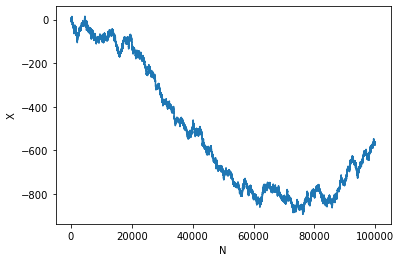

In [2]:
N  = 100000;  
rw = np.cumsum(1-2*np.random.randint(0, 2, N))      
plt.plot(rw);  plt.xlabel('N'); plt.ylabel('X');


Ito equation 
$$
dy = f(y,t)dt + G(y,t)dW
$$


Stratonovich equation 
$$
dy = \tilde{f}(y,t)dt + G(y,t)∘dW
$$
such that $\tilde{f}(y,t) = {f}(y,t)-\frac12 f \nabla\cdot f$



## Example 2

Integrate the one-dimensional Ito equation   $$dx = -(a + b^2 x)(1-x^2)dt + b(1-x^2) dW$$
with initial condition x0 = 0.1

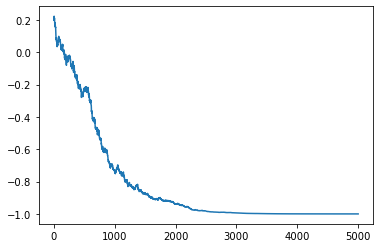

In [3]:
a = 1.0
b = 0.2
tspan = np.linspace(0.0, 6.0, 5001)
x0 = 0.2

def f(x, t):
    return (a + x*b**2)*(x**2-1)

def g(x, t):
    return b*(1 - x**2)

result = sdeint.itoint(f, g, x0, tspan)
plt.plot(result)

## Example 3

Integrate the two-dimensional Ito equation   $$d\mathbf{x} =\mathbf{A} dt +B \mathbf{dW}$$
with initial condition x0 = 0.1

In [4]:
import numpy as np
import sdeint

A = np.array([[-0.5, -2.0],
              [ 2.0, -1.0]])

B = np.diag([0.5, 0.5]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 10.0, 10001)
x0 = np.array([3.0, 3.0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B

result = sdeint.itoint(f, G, x0, tspan)

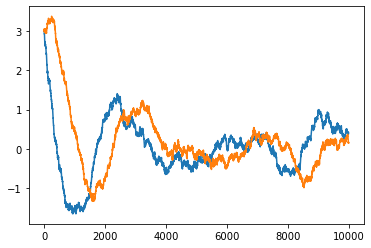

In [5]:
plt.plot(result)

## Example 4 


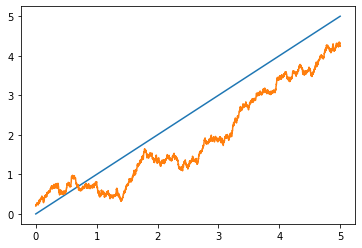

In [6]:
a = 1.0
b = 0.5
tspan = np.linspace(0.0, 5.0, 5001)
x0 = 0.2

def f(x, t):
    return a

def g(x, t):
    return b

result = sdeint.itoint(f, g, x0, tspan)
plt.plot(tspan, tspan*a, tspan, result, '-')

## Example 5
Random walk in 2D


In [7]:
import numpy as np
import sdeint

A = np.array([[-0, -0],
              [ .0, -0]])

B = np.diag([0.5, 0.5]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 10.0, 10001)
x0 = np.array([3.0, 3.0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B

result = sdeint.itoint(f, G, x0, tspan)

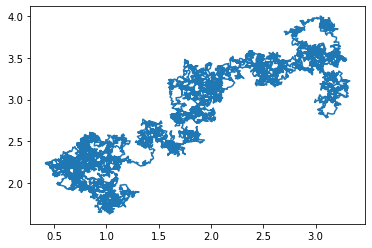

In [8]:
plt.plot(result[:, 0], result[:, 1])

## Example 6
Effect of noise in the exponential decays


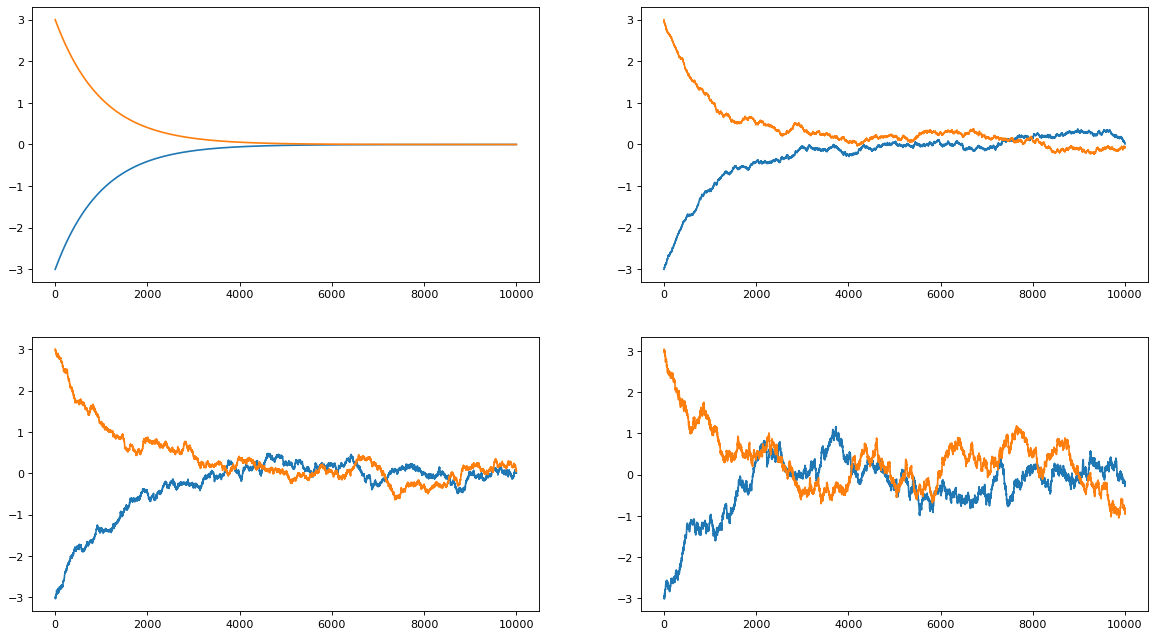

In [9]:
import numpy as np
import sdeint

b = 0.1
A = np.array([[-1, -0],
              [ .0, -1]])

tspan = np.linspace(0.0, 10.0, 10001)
x0 = np.array([-3.0, 3.0])

def B1(b):
    B = np.diag([b, b])
    return B
    
def f(x, t):
    return A.dot(x)

def G(x, t):
    return B


fig = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k'); 

sp =  fig.add_subplot(2, 2, 1 ); B = B1(.0)
result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result);


sp =  fig.add_subplot(2, 2, 2 ); B = B1(.2)
result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result);


sp =  fig.add_subplot(2, 2, 3 ); B = B1(.4)
result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result);


sp =  fig.add_subplot(2, 2, 4 ); B = B1(.8)
result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result);

## Example 7

Lotka-Volterra for populations change through time according to the pair of equations:
LotkaVolterra 

$$
\frac{dx}{dt} =\alpha x-\beta xy 
$$
$$
\frac {dy}{dt} =\delta xy-\gamma y
$$

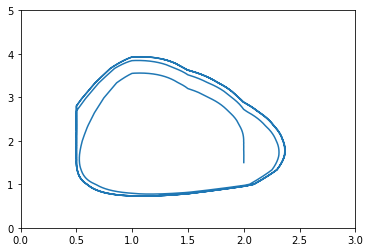

In [10]:
import numpy as np
import sdeint

a, b, c, d, e = 3, 2, 3, 3, -.25
A = np.array([[a, 0],
              [ 0, -c]])

def B1(b):
    B = np.diag([b, b])
    return B

tspan = np.linspace(0.0, 10.0, 10001)
x0 = np.array([2, 1.5])

def f(x, t):
    A[0, 1] = -b*x[0]
    A[1, 0] = d*x[1] 
    return A.dot(x)

def G(x, t):
    return B

B = B1(0)
result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result[:, 0], result[:, 1])
plt.xlim(0, 3);  plt.ylim(0, 5); 

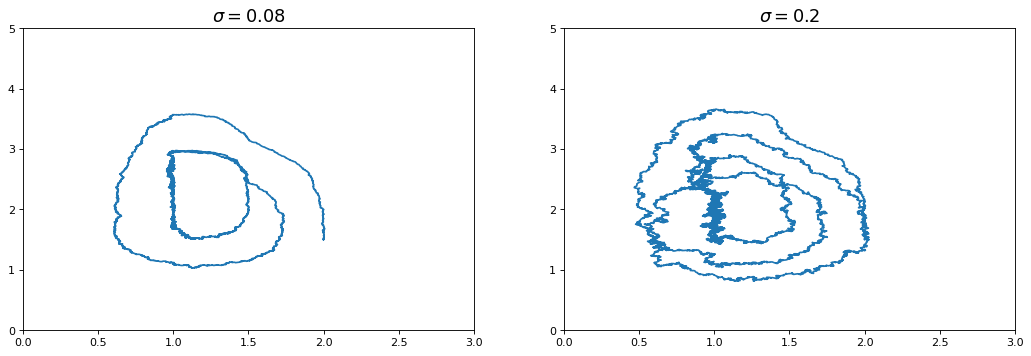

In [11]:
import numpy as np
import sdeint

ww=1
a, b, c, d, e = 3, 2, 3, 3, 0
A = np.array([[a, 0],
              [ e, -c]])

B = np.diag([ww, ww]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 10.0, 10001)
x0 = np.array([2, 1.5])

def f(x, t):
    A[0, 1] = -b*x[0]
    A[1, 0] = d*x[1] 
    return A.dot(x)

def G(x, t):
    return B

fig = plt.figure(figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k'); 
sp =  fig.add_subplot(1, 2, 1 ); B = B1(.08)
result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result[:, 0], result[:, 1]); plt.xlim(0, 3);  plt.ylim(0, 5); 
plt.title('$\sigma=0.08$', fontsize=16);  

sp =  fig.add_subplot(1, 2, 2); B = B1(.20)
result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result[:, 0], result[:, 1]); plt.xlim(0, 3);  plt.ylim(0, 5); 
plt.title('$\sigma=0.2$', fontsize=16);  

## Example 8
Solution of the SDE dx(t)=sin(x(t))+dB(t)


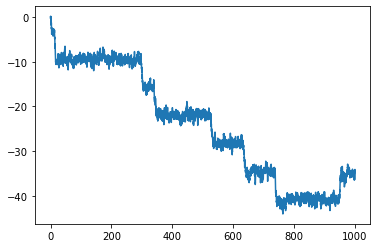

In [12]:
# 
N=10000                    ## times steps
T=1000                      ## Tf
t=np.linspace(0, T, N);    ## t
h=t[1]-t[0]                ## dt
sigma=1.0;                 ## strength of noise

X=np.zeros(np.prod(t.shape));          ## place to store locations
X[0]=0.0;                  ## initial location

for i in range(np.prod(t.shape)-1):
    X[i+1] = X[i] + np.sin(X[i])*h+sigma*np.sqrt(h)*np.random.randn();

    
plt.plot(t,X);